# 分割表のPearsonのχ²統計量

黒木玄

2019-10-29～2019-11-01

$
\newcommand\QED{\text{□}}
\newcommand\R{{\mathbb R}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#分割表の確率分布" data-toc-modified-id="分割表の確率分布-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>分割表の確率分布</a></span><ul class="toc-item"><li><span><a href="#$rc$-個のPoisson分布の直積" data-toc-modified-id="$rc$-個のPoisson分布の直積-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>$rc$ 個のPoisson分布の直積</a></span></li><li><span><a href="#$rc$-項分布-(多項分布)" data-toc-modified-id="$rc$-項分布-(多項分布)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>$rc$ 項分布 (多項分布)</a></span></li><li><span><a href="#$r$-個の-$c$-項分布の直積" data-toc-modified-id="$r$-個の-$c$-項分布の直積-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>$r$ 個の $c$ 項分布の直積</a></span></li><li><span><a href="#周辺度数がすべて固定されている分割表の確率分布" data-toc-modified-id="周辺度数がすべて固定されている分割表の確率分布-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>周辺度数がすべて固定されている分割表の確率分布</a></span></li><li><span><a href="#周辺度数がすべて固定されている分割表の独立性を満たす確率分布の漸近挙動" data-toc-modified-id="周辺度数がすべて固定されている分割表の独立性を満たす確率分布の漸近挙動-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>周辺度数がすべて固定されている分割表の独立性を満たす確率分布の漸近挙動</a></span></li></ul></li><li><span><a href="#Pearsonのχ²統計量" data-toc-modified-id="Pearsonのχ²統計量-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pearsonのχ²統計量</a></span><ul class="toc-item"><li><span><a href="#分割表におけるPearsonのχ²統計量が漸近的に満たす確率分布" data-toc-modified-id="分割表におけるPearsonのχ²統計量が漸近的に満たす確率分布-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>分割表におけるPearsonのχ²統計量が漸近的に満たす確率分布</a></span></li><li><span><a href="#数値的確認" data-toc-modified-id="数値的確認-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>数値的確認</a></span><ul class="toc-item"><li><span><a href="#数値的確認:-$rc$-個のPoisson分布の直積の場合" data-toc-modified-id="数値的確認:-$rc$-個のPoisson分布の直積の場合-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>数値的確認: $rc$ 個のPoisson分布の直積の場合</a></span></li><li><span><a href="#数値的確認:-$rc$-項分布の場合" data-toc-modified-id="数値的確認:-$rc$-項分布の場合-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>数値的確認: $rc$ 項分布の場合</a></span></li><li><span><a href="#数値的確認:-$r$-個の-$c$-項分布の直積分布の場合" data-toc-modified-id="数値的確認:-$r$-個の-$c$-項分布の直積分布の場合-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>数値的確認: $r$ 個の $c$ 項分布の直積分布の場合</a></span></li></ul></li></ul></li></ul></div>

In [1]:
using Distributions
using Plots

# Plots.jlのデフォルトの設定を表示
@show Plots.reset_defaults()

# legendの半透明化
@show default(:bglegend, plot_color(default(:bg), 0.5))
@show default(:fglegend, plot_color(ifelse(isdark(plot_color(default(:bg))), :white, :black), 0.6));

using Base64
displayfile(mime, file; tag="img") = open(file) do f
    base64 = base64encode(f)
    display("text/html", """<$(tag) src="data:$(mime);base64,$(base64)"/>""")
end

pyplotclf() = if backend() == Plots.PyPlotBackend(); PyPlot.clf(); end 

function retina(P::Plots.Plot; scale=3)
    Q = deepcopy(P)
    Q[:dpi] = round(Int, scale*P[:dpi])
    base64 = base64encode(show, MIME("image/png"), Q)
    mime = "image/png"
    width = P[:size][1]
    display("text/html", """<img width=$(width) src="data:$(mime);base64,$(base64)"/>""")
    pyplotclf()
end

function retinasavefig(P::Plots.Plot, fn::AbstractString; scale=3)
    Q = deepcopy(P)
    Q[:dpi] = round(Int, scale*P[:dpi])
    savefig(Q, fn)
    pyplotclf()
end

function retinasavedisp(P::Plots.Plot, fn::AbstractString; scale=3)
    retinasavefig(P, fn; scale=scale)
    displayfile("image/png", fn; tag="img width=$(P[:size][1])")
    pyplotclf()
end

retinasavedisp(fn::AbstractString; scale=3) = (P -> retinasavedisp(P, fn; scale=scale))

pyplot(fmt=:svg)

Plots.reset_defaults() = Dict{Symbol,Any}(:lims=>:auto,:minorgrid=>false,:ticks=>:auto,:foreground_color_border=>:match,:gridalpha=>0.1,:tick_direction=>:in,:scale=>:identity,:guidefontfamily=>:match,:guide=>"",:gridstyle=>:solid,:gridlinewidth=>0.5,:minorgridlinewidth=>0.5,:guidefontcolor=>:match,:tickfontfamily=>:match,:foreground_color_minor_grid=>:match,:formatter=>:auto,:tickfontcolor=>:match,:tickfontvalign=>:vcenter,:mirror=>false,:draw_arrow=>false,:foreground_color_axis=>:match,:foreground_color_text=>:match,:showaxis=>true,:minorgridalpha=>0.05,:widen=>true,:rotation=>0,:flip=>false,:guidefonthalign=>:hcenter,:guidefontvalign=>:vcenter,:minorgridstyle=>:solid,:discrete_values=>Any[],:tickfontsize=>8,:foreground_color_guide=>:match,:guidefontsize=>11,:foreground_color_grid=>:match,:grid=>true,:link=>Any[],:guide_position=>:auto,:tickfontrotation=>0.0,:guidefontrotation=>0.0,:tickfonthalign=>:hcenter,:minorticks=>false)
default(:bglegend, plot_color(default(:bg), 0.5)) = RGBA{F

Plots.PyPlotBackend()

## 分割表の確率分布

非負の整数からなる $r\times c$ 行列に値を持つ確率変数を**分割表 (contingency table)** と呼ぶ. 以下では, $r\times c$ の分割表を $r\times c$ の行列 $A=[a_{ij}]$ で表す.  以下において $i$ は $1,\ldots,r$ を走り, $j$ は $1,\ldots,c$ を走るものとする.

このノートでは分割表の確率分布として以下の4種類を考える.  そして, サンプルを生成する分布としては, 独立性の条件を満たすものを考える.

### $rc$ 個のPoisson分布の直積

$\Lambda=[\lambda_{ij}]$ は正の実数を成分とする $r\times c$ 行列であるとし, 

$$
\lambda = \sum_{i,j} \lambda_{ij}, \quad
p_{ij} = \frac{\lambda_{ij}}{\lambda}, \quad
P = [p_{ij}]
$$

とおく.  このとき分割表 $A=[a_{ij}]$ が生じる確率 $p(A|\Lambda)$ を

$$
p(A|\Lambda) = 
\prod_{i,j} \frac{e^{-\lambda_{ij}} \lambda_{ij}^{a_{ij}}}{a_{ij}!}
$$

と定めることができる.  このようにして定まる分割表の確率分布を $rc$ 個のPoisson分布の直積と呼ぶ.  

この $rc$ 個のPoisson分布の直積において, 各 $a_{ij}$ の期待値は $\lambda_{ij}$ になり, $a_{ij}$ 達の総和の期待値は $\lambda$ になる.

パラメーター $\Lambda=[\lambda_{ij}]$ もしくは $P=[p_{ij}]$ が独立性の条件を満たしているとは, $p_{ij}$ 達が, 

$$
p_{ij} = p_i q_j, \quad
p_i, q_j \geqq 0, \quad
\sum_i p_i = \sum_j q_j = 1
$$

と表わされることだと定める.  この条件は

$$
\mu_i = \lambda p_i, \quad \nu_j = \lambda q_j
$$

と定めると,

$$
\lambda_{ij} = \frac{\mu_i\nu_j}{\lambda}, \quad
\mu_i, \nu_j \geqq 0, \quad
\sum_i \mu_i = \sum_j \nu_j = \lambda
$$

と書き直される.  このとき,

$$
p(A|\Lambda) = 
\prod_{i,j} \frac{e^{-\mu_i\nu_j/\lambda} (\mu_i\nu_j/\lambda)^{a_{ij}}}{a_{ij}!}.
$$

$rc$ 個のPoisson分布の直積におけるパラメーター全体の空間の次元は $rc$ であり, その中で独立性を満たすパラメーター達のなす部分空間の次元は $\lambda$ の分の $1$ と $\mu_i$ 達の分の $r-1$ と $\nu_j$ 達の分の $c-1$ の総和である $r+c-1$ 次元になり, パラメーター全体の空間との次元の差は $rc-r-c+1=(r-1)(c-1)$ になる.  この $(r-1)(c-1)$ がχ²検定におけるχ²分布の自由度になる.

### $rc$ 項分布 (多項分布)

$p_{ij}$ は非負の実数であるとし, それらの総和は $1$ になると仮定し, $P=[p_{ij}]$ とおく.

非負の整数成分の $r\times c$ 行列を $r\times c$ の分割表と呼ぶのであった.  成分の総和が $n$ に固定された $r\times c$ の分割表 $A=[a_{ij}]$, 

$$
\sum_{i,j} a_{ij} = n
$$

が生じる確率を

$$
p(A|n,P) = 
n!\prod_{i,j}\frac{p_{ij}^{a_{ij}}}{a_{ij}!}
$$

と定めることによって, 成分の総和が $n$ に固定された分割表全体に確率分布を定めることができる. これを $rc$ 項分布と呼ぶことにする.

この $rc$ 項分布における $a_{ij}$ の期待値 $\lambda_{ij}$ は

$$
\lambda_{ij} = np_{ij}
$$

になる.  これを用いると, $rc$ 項分布における確率は

$$
p(A|n,P) = 
\frac{n!}{n^n}\prod_{i,j}\frac{\lambda_{ij}^{a_{ij}}}{a_{ij}!}
$$

と書き直される. 

この場合のパラメーター $P=[p_{ij}]$ に関する独立性の条件は

$$
p_{ij} = p_i q_j, \quad
p_i, q_j \geqq 0, \quad
\sum_i p_i = \sum_j q_j = 1
$$

もしくは

$$
\lambda_{ij} = \frac{\mu_i\nu_j}{\lambda}, \quad
\mu_i, \nu_j \geqq 0, \quad
\sum_i \mu_i = \sum_j \nu_j = n
$$

と書ける.

$rc$ 項分布におけるパラメーター全体の空間の次元は $\sum_{i,j} p_{ij} = 1$ という制限によって $rc$ より1小さい $rc-1$ になり, 独立性を満たすパラメーター達のなす部分空間の次元は $p_i$ 達の分の $r-1$ と $q_i$ 達の分の $c-1$ の和の $r+c-2$ になり, 全体の次元との差は $(r-1)(c-1)$ になる.  この $(r-1)(c-1)$ がχ²検定におけるχ²分布の自由度になる.

### $r$ 個の $c$ 項分布の直積

$n$, $\mu_i$ は非負の整数であるとし, $\sum_i mu_i = n$ と仮定し, 

$$
\mu = (\mu_1,\ldots,\mu_r)
$$

とおく. $q_{ij}$ は非負の実数であるとし, $\sum_j q_{ij}=1$ であると仮定し,

$$
Q = [q_{ij}]
$$

とおく.

各行の総和が $\mu_i$ になるという条件

$$
\sum_j a_{ij} = \mu_i
$$

という条件を満たす分割表 $A=[a_{ij}]$ が生じる確率を

$$
p(A|\mu, Q) = \prod_i\left(\mu_i!\prod_j\frac{q_{ij}^{a_{ij}}}{a_{ij}!}\right)
$$

と定めることによって, 各行の総和が $\mu_i$ になるという制限付きの分割表全体に確率分布を定義できる.  これを $r$ 個の $c$ 項分布の直積と呼ぶことにする.

この $rc$ 項分布にいて, 各 $a_{ij}$ の期待値は $\lambda_{ij}$ は

$$
\lambda_{ij} = \mu_i q_{ij}
$$

になる. これを用いると, $r$ 個の $c$ 項分布の直積における確率は

$$
p(A|\mu, Q) = \prod_i\frac{\mu_i!}{\mu_i^{\mu_i}}\cdot\prod_{i,j}\frac{\lambda_{ij}^{a_{ij}}}{a_{ij}!}
$$

と書き直される.

この場合の独立性の条件は

$$
\nu_j = \sum_i \lambda_{ij}, \quad
q_j = \frac{\nu_j}{n}
$$

とおくと

$$
q_{1j} = \cdots = q_{rj} = q_j
$$

もしくは

$$
\frac{\lambda_{1j}}{\mu_1} = \cdots = \frac{\lambda_{rj}}{\mu_r} = \frac{\nu_j}{n}
$$

と書ける.

$r$ 個の $c$ 項分布におけるパラメーター全体の空間の次元は $r(c-1)$ になり, 独立性を満たすパラメーター達のなす部分空間の次元は $q_i$ 達の分の $c-1$ になり, 全体の次元との差は $(r-1)(c-1)$ になる.  この $(r-1)(c-1)$ がχ²検定におけるχ²分布の自由度になる.

### 周辺度数がすべて固定されている分割表の確率分布

$n$, $\mu_i$, $\nu_j$ は正の整数で

$$
\sum_i \mu_i = \sum_j \nu_j = n
$$

を満たしていると仮定し,

$$
\mu = (\mu_1,\ldots,\mu_r), \quad
\nu = (\nu_1,\ldots,\nu_c)
$$

とおく.  $\lambda_{ij}$ は正の実数であるとし,

$$
\sum_j \lambda_{ij} = \mu_i,\quad
\sum_i \lambda_{ij} = \nu_i
$$

を満たしていると仮定し,

$$
\Lambda = [\lambda_{ij}]
$$

とおく.

すべての行とすべての列の総和が

$$
\sum_j a_{ij} = \mu_i, \quad
\sum_i a_{ij} = \nu_i, \quad
\tag{1}
$$

と固定された分割表 $A=[a_{ij}]$ が生じる確率を

$$
p(A|\mu,\nu,\Lambda) = \frac{1}{Z(\Lambda)}\prod_{i,j}\frac{\lambda_{ij}^{a_{ij}}}{a_{ij}!},\quad
Z(\Lambda) = \sum_A \prod_{i,j}\frac{\lambda_{ij}^{a_{ij}}}{a_{ij}!}
$$

と定めることができる.  ここで $Z(\Lambda)$ の定義和における $A=[a_{ij}]$ は条件(1)を満たす分割表全体を走る.  この確率分布を周辺度数がすべて固定されている場合の分割表の確率分布と呼ぶことにする.

$$
\phi_{kl} = \frac{\lambda_{kl}\lambda_{k+1,l+1}}{\lambda_{k+1,l}\lambda_{k,l+1}}, \quad
s_{kl} = \sum_{i=1}^k \sum_{j=1}^l a_{ij}
$$

とおくと, 

$$
a_{ij} = s_{ij} + s_{i-1,j-1} - s_{i-1,j} - s_{i,j-1}
$$

なので, 上の確率は次のようにも書ける:

$$
p(A|\mu,\nu,\Lambda) = \frac{1}{\widetilde{Z}(\Lambda)}\frac{\prod_{k,l}\phi_{kl}^{s_{kl}}}{\prod_{i,j}a_{ij}!},\quad
\widetilde{Z}(\Lambda) = \sum_A \frac{\prod_{k,l}\phi_{kl}^{s_{kl}}}{\prod_{i,j}a_{ij}!}.
$$

ここで, $i,j,k,l$ はそれぞれ $i=1,\ldots,r$, $j=1,\ldots,c$, $k=1,\ldots,r-1$, $l=1,\ldots,c-1$ を走り, $A$ は条件(1)を満たす分割表全体を走る.

このとき, パラメーター $\Lambda=[\lambda_{ij}]$ の独立性は

$$
\phi_{kl} = 1 \quad (k=1,\ldots,r-1,\; l=1,\ldots,c-1)
$$

という $(r-1)(c-1)$ 個の連立条件で書ける.  パラメーター $\Lambda=[\lambda_{ij}]$ が独立性を満たしているとき, $\lambda_{ij}$ は

$$
\lambda_{ij} = \frac{\mu_i\nu_j}{n}
$$

に一意的に決まってしまい, 上の確率は次の形になる:

$$
p(A|\mu,\nu,\Lambda) = \frac{\prod_i\mu_i!\cdot\prod_j\nu_j!}{n! \prod_{i,j}a_{ij}!}.
\tag{2}
$$

すなわち, パラメーター $\Lambda=[\lambda_{ij}]$ が独立性を満たしているとき, 

$$
\widetilde{Z}(\Lambda) = \frac{n!}{\prod_i\mu_i!\cdot\prod_j\nu_j!}
$$

になる. 確率(2)は次のように書き直される:

$$
p(A|\mu,\nu,\Lambda) = 
\frac{\displaystyle\prod_{j=1}^c\binom{\nu_j}{a_{1j},\ldots,a_{rj}}}{\displaystyle\binom{n}{\mu_1,\ldots,\mu_r}}.
\tag{3}
$$

ここで, 多項係数を次のように書いた:

$$
\binom{n}{m_1,\ldots,m_r} = \frac{n!}{m_1!\cdots m_r!}, \quad
m_1+\cdots+m_r = n.
$$

この多項係数は $n$ 個のものを $m_1$ 個, $\ldots$, $m_r$ 個に分割する方法の個数を表している. 確率(3)の分子分母は以下のような意味を持っている.

* 番号が $j$ の玉が $\nu_j$ 個ある状況を考える. 
* 全部で $\sum_j \nu_j = n$ 個の玉達の全体を $m_1$ 個, $\ldots$, $m_r$ 個に分割する.
* (3)の分母は $n$ 個の玉達の全体を $m_1$ 個, $\ldots$, $m_r$ 個に分割する方法の個数になっている.
* (3)の分子の各因子は $\nu_j$ 個の番号 $j$ の玉達を $a_{1j}$ 個, $\ldots$, $a_{rj}$ 個に分割する方法の個数になっている.

このことから, ($***$)で定義される独立性を満たす分割表の確率分布がどのようなものであるかがわかる.

周辺度数がすべて固定されている分割表の確率分布のパラメーター全体の空間の次元は $(r-1)(c-1)$ になり, 独立性の条件を満たすパラメーター達のなす部分空間の次元は $0$ になり, 全体の次元との差は $(r-1)(c-1)$ になる.

**注意:** $r=c=2$ の場合の周辺度数がすべて固定されている $2\times 2$ の分割表の確率分布は Fisher's noncentral hypergeometric distribution と呼ばれており, その独立性を満たす場合は hypergeometric distribution と呼ばれている. $\QED$

### 周辺度数がすべて固定されている分割表の独立性を満たす確率分布の漸近挙動

前節の記号をそのまま引き継ぎ, 

$$
\lambda_{ij} = np_{ij}, \quad a_{ij} - \lambda_{ij} = \sqrt{n}\;x_{ij} 
$$

となっていると仮定する.  このとき, 前節の式(2)の中の階乗にStirlingの近似公式を適用すると, $n\to\infty$ において, 

$$
\begin{aligned}
p(A|\mu,\nu,\Lambda) & =
\frac{\prod_i(\mu_i^{\mu_i}e^{-\mu_i}\sqrt{2\pi\mu_i})\cdot\prod_j(\nu_j^{\nu_j}e^{-\nu_j}\sqrt{2\pi\nu_j})!}
{n^n e^{-n}\sqrt{2\pi n} \prod_{i,j}(a_{ij}^{a_{ij}}e^{-a_{ij}}\sqrt{2\pi a_{ij}})}
(1+o(1))
\\ &=
\frac{\prod_i(\mu_i^{\mu_i}\sqrt{2\pi\mu_i})\cdot\prod_j(\nu_j^{\nu_j}\sqrt{2\pi\nu_j})!}
{n^n \sqrt{2\pi n} \prod_{i,j}(a_{ij}^{a_{ij}}\sqrt{2\pi a_{ij}})}
(1+o(1))
\\ &=
\sqrt{\frac{\prod_i\mu_i\cdot\prod_j\nu_j}{(2\pi)^{(r-1)(c-1)}\prod_{i,j}a_{ij}}}
\exp\left(-\sum_{i,j}a_{ij}\log\frac{n a_{ij}}{\mu_i\nu_j}\right)
(1+o(1))
\\ &=
\sqrt{\frac{\prod_i\mu_i\cdot\prod_j\nu_j}{(2\pi)^{(r-1)(c-1)}\prod_{i,j}a_{ij}}}
\exp\left(-\sum_{i,j}a_{ij}\log\frac{a_{ij}}{\lambda_{ij}}\right)
(1+o(1))
\\ &=
\sqrt{\left(\frac{n}{2\pi}\right)^{(r-1)(c-1)}}
\exp\left(-\sum_{i,j}a_{ij}\log\frac{a_{ij}}{\lambda_{ij}}\right)
(1+o(1))
\end{aligned}
$$

1つ目の等号でStirlingの公式を用い, 2つ目の等号で $\sum_i\mu_i = \sum_j \nu_j = \sum_{i,j}a_{ij} = n$ を使い, 3つ目の等号では指数部分に

$$
\mu_i = \sum_j a_{ij}, \quad
\nu_i = \sum_i a_{ij}, \quad
n = \sum_{i,j} a_{ij}
$$

を使い, 4つ目の等号では $\lambda_{ij} = \mu_i\nu_j/n$ を使い, 5つ目の等号では $a_{ij}=\lambda_{ij}(1+o(1))$ と $\lambda_{ij}=\mu_i\nu_j/n$ を使った. 

このとき, $\lambda$ を大きくすると, 上で得た近似式の指数函数の中身の $-2$ 倍は次のように近似される:

$$
\begin{aligned}
2\sum_{i,j} a_{ij}\log\frac{a_{ij}}{\lambda_{ij}} &=
2\sum_{i,j}\lambda_{ij}
\left(1+\frac{a_{ij}-\lambda_{ij}}{\lambda_{ij}}\right)
\log\left(1+\frac{a_{ij}-\lambda_{ij}}{\lambda_{ij}}\right)
\\ & =
2\sum_{i,j}\left(a_{ij} - \lambda_{ij} + \frac{(a_{ij}-\lambda_{ij})^2}{2\lambda_{ij}}\right) +
O\left(\frac{1}{\sqrt{n}}\right)
\\ & =
\sum_{i,j}\frac{(a_{ij}-\lambda_{ij})^2}{\lambda_{ij}} + 
O\left(\frac{1}{\sqrt{n}}\right).
\end{aligned}
$$

1つ目の等号で $a_{ij}=\lambda_{ij}(1+(a_{ij}-\lambda_{ij})/\lambda_{ij})$ を用い, 2つ目の等号で $\log(1+x)=x-x^2/2+O(x^3)$ を用い, 3つ目の等号で $\sum_{i,j}a_{ij}=\sum_{i,j}\lambda_{ij}=n$ を用いた.

さらに, $\lambda_{ij}=np_{ij}$, $a_{ij} - \lambda_{ij} = \sqrt{n}\;x_{ij}$ より, 
 
$$
\begin{aligned}
2\sum_{i,j} a_{ij}\log\frac{a_{ij}}{\lambda_{ij}} &=
\sum_{i,j}\frac{(a_{ij}-\lambda_{ij})^2}{\lambda_{ij}} + O\left(\frac{1}{\sqrt{n}}\right)
\\ &=
\sum_{i,j}\frac{x_{ij}^2}{p_{ij}} + O\left(\frac{1}{\sqrt{n}}\right)
\end{aligned}
$$

でかつ $da_{ij} = \sqrt{n}\;dx_{ij}$ より, 

$$
p(A|\mu,\nu,\Lambda)\prod_{i=1}^{r-1}\prod_{j=1}^{c-1}da_{ij}
\approx
\frac{1}{\sqrt{(2\pi)^{(r-1)(c-1)}}}
\exp\left(-\frac{1}{2}\sum_{i,j}\frac{x_{ij}^2}{p_{ij}}\right)
\prod_{i=1}^{r-1}\prod_{j=1}^{c-1}dx_{ij}.
$$


以上の計算結果から, 周辺度数がすべて固定されている分割表の独立性を満たす確率分布は, $n$ が大きなときに, 台が $(r-1)(c-1)$ 次元の多変量正規分布で近似され, 統計量

$$
X^2 = \sum_{i,j}\frac{(a_{ij}-\lambda_{ij})^2}{\lambda_{ij}} = 
\sum_{i,j}\frac{x_{ij}^2}{p_{ij}}
$$

が漸近的に自由度 $(r-1)(c-1)$ のχ²分布に従うことがわかる.  一般に台が $N$ 次元の

$$
\text{const.} \exp\left(-\frac{1}{2}\sum_{i,j}a_{ij}x_i x_j\right)\times\text{(delta function with $N$-dim. support)}
$$

の形の平均が $0$ の多変量正規分布において, $\sum_{i,j}a_{ij}x_i x_j$ の部分に対応する統計量は自由度 $N$ のχ²分布を満たすことを使った.  

さらに, 上の $X^2$ で近似される統計量

$$
G = 2\sum_{i,j} a_{ij}\log\frac{a_{ij}}{\lambda_{ij}}
$$

も漸近的に自由度 $(r-1)(c-1)$ のχ²分布に従うこともわかる.

次の節で周辺度数がすべて固定されていない場合にも同様の結果が得られることを説明する.

## Pearsonのχ²統計量

$r\times c$ の分割表 $A=[a_{ij}]$ に対して, 以下の量をPearsonのχ²統計量と呼ぶ:

$$
X^2 = \sum_{i,j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}.
$$

ここで, 

$$
O_{ij} = a_{ij}, \quad
E_{ij} = \frac{M_i N_j}{n}, \quad
n = \sum_{i,j} a_{ij}, \quad
M_i = \sum_j a_{ij}, \quad
N_j = \sum_i a_{ij}.
$$

次のように $G$ 統計量を定義しておく:

$$
G = 2\sum_{i,j} O_{ij}\log\frac{O_{ij}}{E_{ij}}.
$$

### 分割表におけるPearsonのχ²統計量が漸近的に満たす確率分布

**定理:** 分割表について前節で定義した4つの確率分布のどれにおいても, そのパラメーターが独立性を満たしているならば, Pearsonのχ²統計量 $X^2$ と $G$ 統計量 $G$ はともに, $\lambda$ もしくは $n$ を大きくするとき漸近的に, 自由度 $(r-1)(c-1)$ のχ²分布に従う. $\QED$

前節において, 周辺度数がすべて固定されている分割表の独立性を満たす確率分布の場合にはこれが成立することをすでに示した.

他の3つの場合のこの定理はWilksの定理から導かれる. 以下ではこの定理の成立を数値的に確認してみよう.

### 数値的確認

In [2]:
safediv(x, y) = iszero(x) ? x : x/y
safemult(x, y) = iszero(x) ? x : x*y

function chisq(A)
    r, c = size(A)
    n = sum(A)
    M = vec(sum(A, dims=2))
    N = vec(sum(A, dims=1))
    sum(safediv((A[i,j] - M[i]*N[j]/n)^2, M[i]*N[j]/n) for i in 1:r, j in 1:c)
end

function gstat(A)
    r, c = size(A)
    n = sum(A)
    M = vec(sum(A, dims=2))
    N = vec(sum(A, dims=1))
    2sum(safemult(A[i,j], log(A[i,j]) - log(M[i]*N[j]/n)) for i in 1:r, j in 1:c)
end

A = [
    1 2 3
    2 4 6
]
@show chisq(A)
@show gstat(A)

B = [
    1 8 1
    2 1 6
]
@show chisq(B)
@show gstat(B);

chisq(A) = 0.0
gstat(A) = 0.0
chisq(B) = 9.322398589065257
gstat(B) = 10.447245765410694


In [3]:
param_indep(p, q) = p .* q'
P = param_indep([0.2, 0.3, 0.5], [0.1, 0.2, 0.3, 0.4])
@show P
@show sum(P);

P = [0.02 0.04 0.06 0.08; 0.03 0.06 0.09 0.12; 0.05 0.1 0.15 0.2]
sum(P) = 1.0000000000000002


In [4]:
df_chisq(r, c) = (r-1)*(c-1)
df_chisq(P) = prod(size(P) .- 1)
@show size(P)
@show size(P) .- 1
@show df_chisq(P);

size(P) = (3, 4)
size(P) .- 1 = (2, 3)
df_chisq(P) = 6


In [5]:
P = param_indep([0.2, 0.3, 0.5], [0.1, 0.2, 0.3, 0.4])

3×4 Array{Float64,2}:
 0.02  0.04  0.06  0.08
 0.03  0.06  0.09  0.12
 0.05  0.1   0.15  0.2 

#### 数値的確認: $rc$ 個のPoisson分布の直積の場合

In [6]:
prod_Poisson(Λ) = product_distribution(Poisson.(vec(Λ)))

function sim_Poisson(; λ=100, P=param_indep([0.2, 0.3, 0.5], [0.1, 0.2, 0.3, 0.4]), L=10^5)
    dist = prod_Poisson(λ*P)
    PearsonChisq = Array{Float64,1}(undef, L)
    G_Statistics = Array{Float64,1}(undef, L)
    for l in 1:L
        A = reshape(rand(dist), size(P))
        PearsonChisq[l] = chisq(A)
        G_Statistics[l] = gstat(A)
    end
    PearsonChisq, G_Statistics
end

function plot_sim_Poisson(; λ=100, P=param_indep([0.2, 0.3, 0.5], [0.1, 0.2, 0.3, 0.4]), L=10^5)
    @time PearsonChisq, G_Statistics =  sim_Poisson(λ=λ, P=P, L=L)
    @show size(P)
    @show df = df_chisq(P)
    @show chisq_dist = Chisq(df)
    f(x) = pdf(chisq_dist, x)
    xmax = 4*df
    x = range(0, xmax, length=200)
    bin = range(0, xmax, step=0.5)

    sleep(0.1)

    P1 = plot(size=(500, 300), xlabel="x")
    plot!(title="Sample dist. = product of Poisson distributions (λ = $λ)", titlefontsize=10)
    histogram!(PearsonChisq; bin=bin, norm=true, alpha=0.3, label="Pearson χ²-statistics")
    plot!(x, f.(x); label="pdf of Chisq(df=$(df)) dist.")

    P2 = plot(size=(500, 300), xlabel="x")
    plot!(title="Sample dist. = product of Poisson distributions (λ = $λ)", titlefontsize=10)
    histogram!(G_Statistics; bin=bin, norm=true, alpha=0.3, label="G-statistics")
    plot!(x, f.(x); label="pdf of Chisq(df=$(df)) dist.")

    plot(P1, P2; size=(500, 600), layout=grid(2,1))
end

plot_sim_Poisson (generic function with 1 method)

  1.300380 seconds (4.71 M allocations: 193.448 MiB, 5.26% gc time)
size(P) = (3, 4)
df = df_chisq(P) = 6
chisq_dist = Chisq(df) = Chisq{Float64}(ν=6.0)


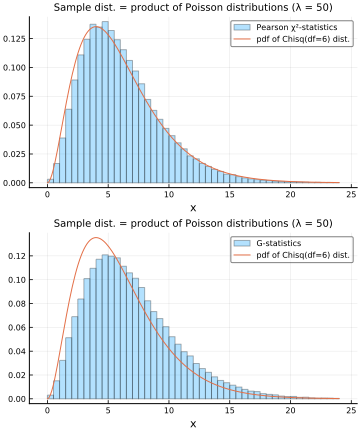

In [7]:
plot_sim_Poisson(λ=50, P=P)

  1.197492 seconds (4.63 M allocations: 186.995 MiB, 14.11% gc time)
size(P) = (3, 4)
df = df_chisq(P) = 6
chisq_dist = Chisq(df) = Chisq{Float64}(ν=6.0)


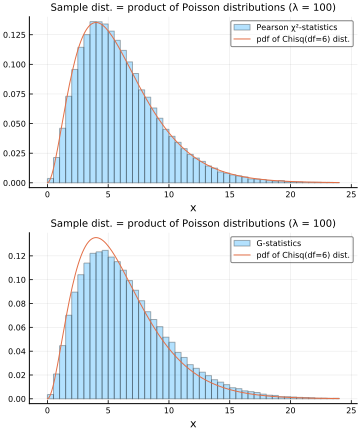

In [8]:
plot_sim_Poisson(λ=100, P=P)

  0.658503 seconds (4.65 M allocations: 185.652 MiB, 5.12% gc time)
size(P) = (3, 4)
df = df_chisq(P) = 6
chisq_dist = Chisq(df) = Chisq{Float64}(ν=6.0)


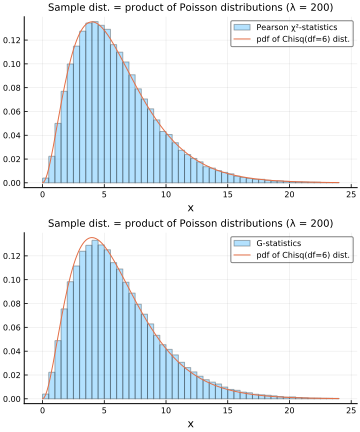

In [9]:
plot_sim_Poisson(λ=200, P=P)

小さな $\lambda$ での誤差は $G$ 統計量よりも, Pearsonのχ²統計量の方が小さい. 

#### 数値的確認: $rc$ 項分布の場合

In [10]:
function sim_Multinomial(; n=100, P=param_indep([0.2, 0.3, 0.5], [0.1, 0.2, 0.3, 0.4]), L=10^5)
    dist = Multinomial(n, vec(P))
    PearsonChisq = Array{Float64,1}(undef, L)
    G_Statistics = Array{Float64,1}(undef, L)
    for l in 1:L
        A = reshape(rand(dist), size(P))
        PearsonChisq[l] = chisq(A)
        G_Statistics[l] = gstat(A)
    end
    PearsonChisq, G_Statistics
end

function plot_sim_Multinomial(; n=100, P=param_indep([0.2, 0.3, 0.5], [0.1, 0.2, 0.3, 0.4]), L=10^5)
    @time PearsonChisq, G_Statistics =  sim_Multinomial(n=n, P=P, L=L)
    @show size(P)
    @show df = df_chisq(P)
    @show chisq_dist = Chisq(df)
    f(x) = pdf(chisq_dist, x)
    xmax = 4*df
    x = range(0, xmax, length=200)
    bin = range(0, xmax, step=0.5)

    sleep(0.1)

    P1 = plot(size=(500, 300), xlabel="x")
    plot!(title="Sample dist. = multinomial distribution (n = $n)", titlefontsize=10)
    histogram!(PearsonChisq; bin=bin, norm=true, alpha=0.3, label="Pearson χ²-statistics")
    plot!(x, f.(x); label="pdf of Chisq(df=$(df)) dist.")

    P2 = plot(size=(500, 300), xlabel="x")
    plot!(title="Sample dist. = multinomial distribution (n = $n)", titlefontsize=10)
    histogram!(G_Statistics; bin=bin, norm=true, alpha=0.3, label="G-statistics")
    plot!(x, f.(x); label="pdf of Chisq(df=$(df)) dist.")

    plot(P1, P2; size=(500, 600), layout=grid(2,1))
end

plot_sim_Multinomial (generic function with 1 method)

  0.852261 seconds (4.85 M allocations: 194.388 MiB, 4.83% gc time)
size(P) = (3, 4)
df = df_chisq(P) = 6
chisq_dist = Chisq(df) = Chisq{Float64}(ν=6.0)


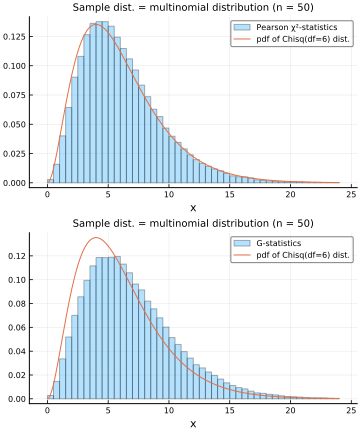

In [11]:
plot_sim_Multinomial(n=50, P=P)

  0.663290 seconds (4.83 M allocations: 189.879 MiB, 6.24% gc time)
size(P) = (3, 4)
df = df_chisq(P) = 6
chisq_dist = Chisq(df) = Chisq{Float64}(ν=6.0)


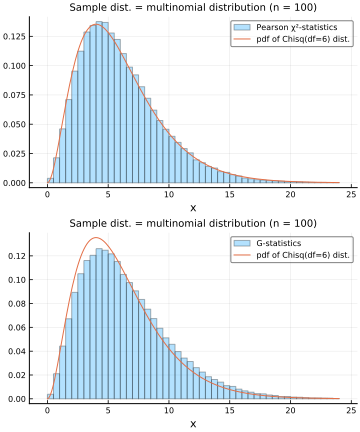

In [12]:
plot_sim_Multinomial(n=100, P=P)

  0.640601 seconds (4.65 M allocations: 185.653 MiB, 5.10% gc time)
size(P) = (3, 4)
df = df_chisq(P) = 6
chisq_dist = Chisq(df) = Chisq{Float64}(ν=6.0)


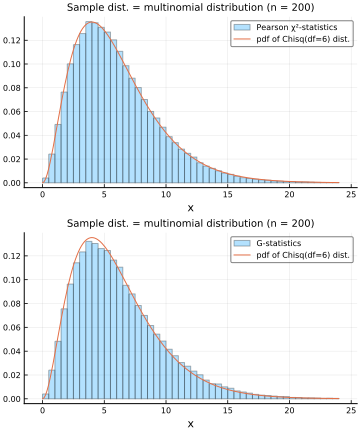

In [13]:
plot_sim_Multinomial(n=200, P=P)

小さな $n$ での誤差は $G$ 統計量よりも, Pearsonのχ²統計量の方が小さい. 

#### 数値的確認: $r$ 個の $c$ 項分布の直積分布の場合

In [14]:
function rand_prod_Multinomial(M, q)
    r, c = length(M), length(q)
    A = Array{Int, 2}(undef, r, c)
    for i in 1:r
        A[i,:] = rand(Multinomial(M[i], q))
    end
    A
end

rand_prod_Multinomial (generic function with 1 method)

In [15]:
M = [20, 30, 50]
q = [0.1, 0.2, 0.3, 0.4]
rand_prod_Multinomial(M, q)

3×4 Array{Int64,2}:
 5  1   6   8
 0  7  10  13
 3  9  16  22

In [16]:
function sim_prod_Multinomial(; M=[20, 30, 50], q=[0.1, 0.2, 0.3, 0.4], L=10^5)
    PearsonChisq = Array{Float64,1}(undef, L)
    G_Statistics = Array{Float64,1}(undef, L)
    for l in 1:L
        A = rand_prod_Multinomial(M, q)
        PearsonChisq[l] = chisq(A)
        G_Statistics[l] = gstat(A)
    end
    PearsonChisq, G_Statistics
end

function plot_sim_prod_Multinomial(; M=[20, 30, 50], q=[0.1, 0.2, 0.3, 0.4], L=10^5)
    n = sum(M)
    @time PearsonChisq, G_Statistics =  sim_prod_Multinomial(M=M, q=q, L=L)
    @show r, c = length(M), length(q)
    @show df = df_chisq(r, c)
    @show chisq_dist = Chisq(df)
    f(x) = pdf(chisq_dist, x)
    xmax = 4*df
    x = range(0, xmax, length=200)
    bin = range(0, xmax, step=0.5)

    sleep(0.1)

    P1 = plot(size=(500, 300), xlabel="x")
    plot!(title="Sample dist. = product of multinomial distributions (n = $n)", titlefontsize=10)
    histogram!(PearsonChisq; bin=bin, norm=true, alpha=0.3, label="Pearson χ²-statistics")
    plot!(x, f.(x); label="pdf of Chisq(df=$(df)) dist.")

    P2 = plot(size=(500, 300), xlabel="x")
    plot!(title="Sample dist. = product of multinomial distributions (n = $n)", titlefontsize=10)
    histogram!(G_Statistics; bin=bin, norm=true, alpha=0.3, label="G-statistics")
    plot!(x, f.(x); label="pdf of Chisq(df=$(df)) dist.")

    plot(P1, P2; size=(500, 600), layout=grid(2,1))
end

plot_sim_prod_Multinomial (generic function with 1 method)

  0.694331 seconds (4.86 M allocations: 215.292 MiB, 6.87% gc time)
(r, c) = (length(M), length(q)) = (3, 4)
df = df_chisq(r, c) = 6
chisq_dist = Chisq(df) = Chisq{Float64}(ν=6.0)


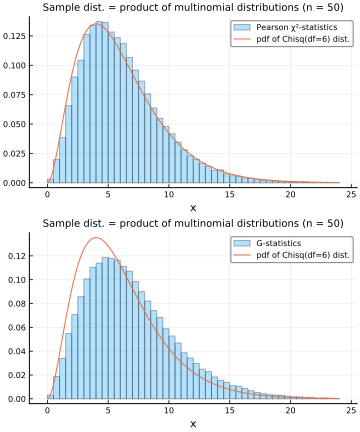

In [17]:
plot_sim_prod_Multinomial(M=div.(M,2), q=q)

  0.655115 seconds (4.87 M allocations: 211.835 MiB, 6.00% gc time)
(r, c) = (length(M), length(q)) = (3, 4)
df = df_chisq(r, c) = 6
chisq_dist = Chisq(df) = Chisq{Float64}(ν=6.0)


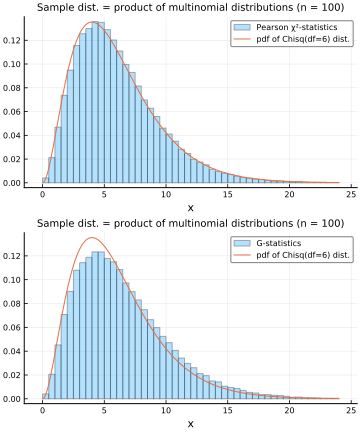

In [18]:
plot_sim_prod_Multinomial(M=M, q=q)

  0.710239 seconds (4.78 M allocations: 208.996 MiB, 6.48% gc time)
(r, c) = (length(M), length(q)) = (3, 4)
df = df_chisq(r, c) = 6
chisq_dist = Chisq(df) = Chisq{Float64}(ν=6.0)


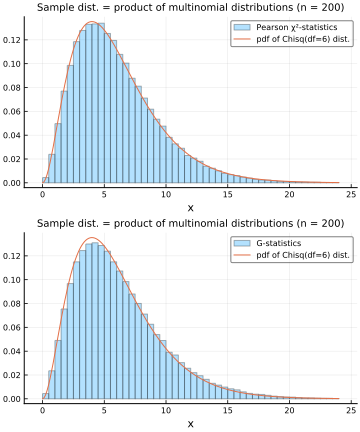

In [19]:
plot_sim_prod_Multinomial(M=2M, q=q)

以上のように, 周辺度数をすべて固定するという不自然な前提を採用しなくても, Pearsonのχ²統計量と $G$ 統計量は漸近的に自由度 $(r-1)(c-1)$ のχ²分布に従っていることを数値的に確認できる.

そして, 小さな $n$ での誤差は $G$ 統計量よりも, Pearsonのχ²統計量の方が小さいことも確認できる.  Pearsonのχ²統計量は優れた統計量である.